In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [8,5]})

In [2]:
from environments import ThreeLoopMRP
from algorithms import rvi_sync, dvi_sync

%load_ext autoreload
%autoreload 2

In [3]:
env = ThreeLoopMRP()
R = env.R
P = env.P

### Synchronous RVI (sRVI) on the 3-loop problem

Text(0.5, 1.0, 'Synchronous RVI on the 3-loop problem')

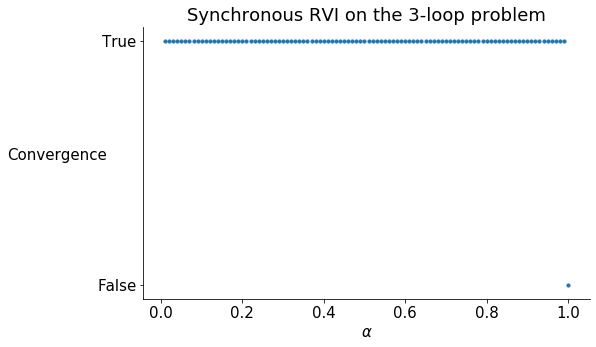

In [6]:
alphas = np.arange(0.01, 1.01, 0.01)

convergence_flags = np.zeros(alphas.shape)
for i, alpha in enumerate(alphas):
    _,convergence,_ = rvi_sync(3, P, R, max_iters=10000, ref_state=1, alpha=alpha) 
    convergence_flags[i] = convergence

plt.scatter(alphas, convergence_flags, s=10)
plt.yticks([0,1], ['False', 'True'])
# plt.bar(alphas, convergence_flags, width=0.01)
# plt.imshow(np.reshape(convergence_flags, (-1,1)), cmap='viridis', interpolation='nearest')
plt.xlabel(r'$\alpha$')
plt.ylabel('Convergence', rotation=0, labelpad=40)
plt.title('Synchronous RVI on the 3-loop problem')

For $\alpha=1$, sRVI does not converge on the (periodic) 3-loop problem.

### Synchronous DVI (sDVI) on the 3-loop problem

In [7]:
alphas = np.arange(0.01, 1.01, 0.01)
betas = np.arange(0.01, 1.01, 0.01)

convergence_flags = np.zeros((alphas.shape[0], betas.shape[0]))
for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        _,convergence,_ = dvi_sync(3, P, R, max_iters=10000, alpha=alpha, beta=beta) 
        convergence_flags[i][j] = convergence

Text(0.5, 1.0, 'Synchronous DVI on the 3-loop problem')

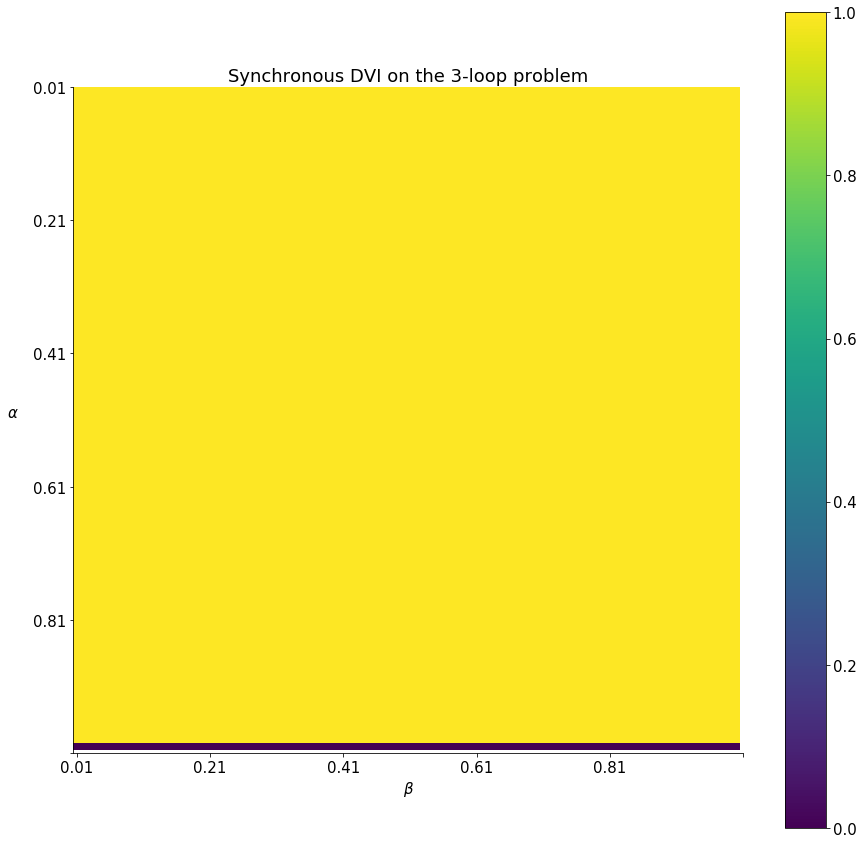

In [8]:
# In the heatmap, 1 means the algorithm converged, 0 means it didn't
plt.figure(figsize=(15,15))
plt.imshow(convergence_flags, cmap='viridis', interpolation='nearest')
plt.xlabel(r'$\beta$')
plt.xticks(range(0,101,20), np.round(betas[::20], 2))
plt.ylabel(r'$\alpha$', rotation=0, labelpad=20)
plt.yticks(range(0,101,20), np.round(alphas[::20], 2))
plt.colorbar()
plt.title('Synchronous DVI on the 3-loop problem')

If $\alpha=1$, sDVI does not converge for any value of $\beta$ on the (periodic) 3-loop problem.